<a href="https://colab.research.google.com/github/Aboli-2002/Deep_learning/blob/main/Regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

# Load the train data

In [3]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [4]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Features
1. PE(Target) - Power Output in MW
2. AT - Atmospheric Temperature in degree Cesius
3. V - Vacuum pressure Pascals
4. AP - Atmospheric Pressure in Pascals
5. RH - Is relative Humidity in %

# Step 2 - Perform Basic data Quality Checks

In [5]:
df.shape

(9568, 5)

In [6]:
df.duplicated().sum()

np.int64(41)

In [7]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [8]:
df.shape

(9527, 5)

In [9]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# Step 3 - Seperate X and Y(PE)

In [11]:
X = df.drop(columns = ["PE"])
Y = df["PE"]

In [12]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 - Apply Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,AT,V,AP,RH
5695,18.52,58.41,1013.77,99.89
7300,8.51,39.66,1015.16,86.61
9066,13.07,42.18,1014.98,87.77
6424,30.07,69.82,1010.39,57.53
6773,13.52,42.34,1017.97,95.34


In [16]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [17]:
xtest.head()

,AT,V,AP,RH
1087,33.26,68.51,1012.49,52.68
6308,8.48,38.50,1013.50,66.51
8021,8.75,36.30,1015.61,57.53
9483,20.78,62.52,1017.58,73.30
4459,19.39,68.61,1011.09,96.51


In [18]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [19]:
xtrain.shape

(7621, 4)

In [20]:
xtest.shape

(1906, 4)

# Step 5 - Preprocess the data

In [21]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [23]:
pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()

).set_output(transform="pandas")

In [24]:
pipe.fit(xtrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [25]:
xtrain_pre = pipe.transform(xtrain)
xtest_pre = pipe.transform(xtest)

In [26]:
xtrain_pre.head()

,AT,V,AP,RH
5695,-0.154993,0.323693,0.084610,1.818417
7300,-1.504241,-1.151828,0.319064,0.907637
9066,-0.889599,-0.953518,0.288703,0.987193
6424,1.401831,1.221597,-0.485502,-1.086753
6773,-0.828943,-0.940927,0.793033,1.506365


In [27]:
xtest_pre.head()

,AT,V,AP,RH
1087,1.831812,1.118507,-0.131290,-1.419379
6308,-1.508285,-1.243114,0.039069,-0.470879
8021,-1.471891,-1.416242,0.394967,-1.086753
9483,0.149632,0.647127,0.727251,-0.005201
4459,-0.037726,1.126376,-0.367431,1.586607


# Step 6 - Bulid the model

In [28]:
xtrain.shape

(7621, 4)

In [29]:
xtrain.shape[1]

4

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [31]:
model = Sequential(
    layers = [
        Input(shape = (xtrain.shape[1],)),
        Dense(units=8, activation="relu"),
        Dense(units=4, activation="relu"),
        Dense(units=1, activation="linear")
    ]
)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

# Train the Weight

In [34]:
hist = model.fit(xtrain_pre, ytrain, epochs=100, validation_split=0.2)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 207284.4375 - mae: 454.9728 - val_loss: 205595.6719 - val_mae: 453.1052
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 206116.8438 - mae: 453.6937 - val_loss: 203190.6406 - val_mae: 450.4754
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 202245.5000 - mae: 449.4507 - val_loss: 193556.2031 - val_mae: 439.7607
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 190045.7188 - mae: 435.7376 - val_loss: 173772.1562 - val_mae: 416.5678
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 167544.4844 - mae: 408.7751 - val_loss: 145516.2656 - val_mae: 379.8862
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 138255.0000 - mae: 369.3765 - val_loss: 113855.7891 - val_mae: 331.5141
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 106648.1562 - mae: 318.7185 - val_loss: 85170.4688 - val_mae: 276.7052
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 78623.64

# Step 7 - Plot Learning curve and evaluate model

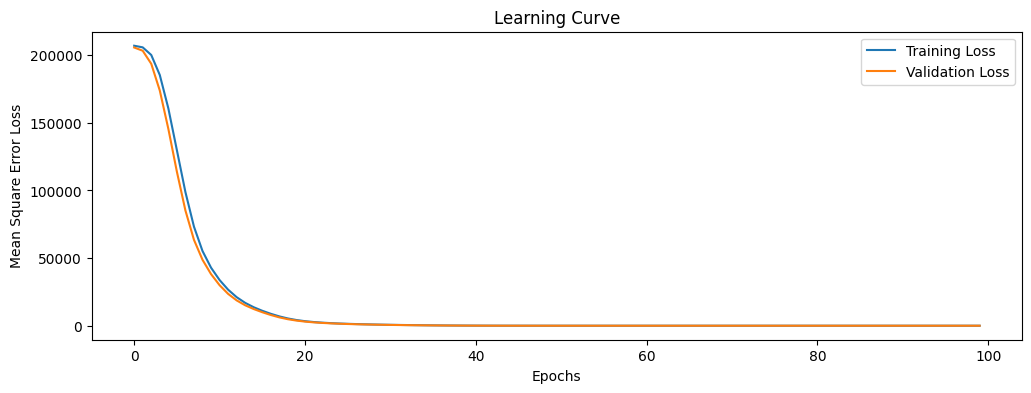

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [36]:
train_mse, train_mae = model.evaluate(xtrain_pre, ytrain)
train_rmse = train_mse ** (1/2)
print(f"Train RMSE : {train_rmse:.2f}")
print(f"Train MAE : {train_mae:.2f}")

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.8067 - mae: 3.6439
Train RMSE : 4.57
Train MAE : 3.63


In [37]:
test_mse, test_mae = model.evaluate(xtest_pre, ytest)
test_rmse  = test_mse ** (1/2)
print(f"Test RMSE : {test_rmse:.2f}")
print(f"Test MAE : {test_mae:.2f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.6550 - mae: 3.5618
Test RMSE : 4.59
Test MAE : 3.67


In [38]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [39]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 Score : {r2:.2%}")

In [40]:
print("Train Results : ")
evaluate_model(model, xtrain_pre, ytrain)

Train Results : 
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE : 4.57
MAE : 3.63
MAPE : 0.80%
R2 Score : 92.72%


In [41]:
print("Test Resuts:")
evaluate_model(model, xtest_pre, ytest)

Test Resuts:
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE : 4.59
MAE : 3.67
MAPE : 0.81%
R2 Score : 93.03%


# Step 8 - Out of sample prediction

In [42]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [43]:
import pandas as pd
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [44]:
xnew.shape

(100, 4)

In [45]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [46]:
xnew_pre = pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380123,0.355958,-0.596825,0.810249
1,1.241431,0.046688,-1.030313,-1.836363
2,1.107989,1.488371,-2.015358,0.857571
3,0.811451,0.626666,-0.318516,0.048294
4,-1.012258,-1.061330,2.112049,-0.164999


In [47]:
ypred = model.predict(xnew_pre)
ypred[0:5]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[445.86124],
       [439.6898 ],
       [430.9257 ],
       [440.55902],
       [474.13422]], dtype=float32)

In [48]:
xnew["PE_pred"] = ypred.round(2)
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.859985
1,28.88,54.89,1007.16,46.60,439.690002
2,27.89,73.21,1001.32,85.88,430.929993
3,25.69,62.26,1011.38,74.08,440.559998
4,12.16,40.81,1025.79,70.97,474.130005
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.829987
96,11.78,39.96,1011.37,82.95,471.910004
97,5.62,41.38,1020.91,86.21,484.170013
98,24.96,74.99,1008.25,80.52,437.760010


In [49]:
xnew.to_csv("plant_res.csv", index=False)

# Save the model object and pipeline

In [50]:
!pip install joblib

In [51]:
import joblib
joblib.dump(pipe, "plant_pre.joblib")

['plant_pre.joblib']

In [52]:
model.save("plant_model.keras")

# Load model objects

In [53]:
p = joblib.load("plant_pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [54]:
from tensorflow.keras.models import load_model
m = load_model("plant_model.keras")
m

<Sequential name=sequential, built=True>

In [55]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)